In [1]:
%load_ext autoreload
# %autoreload 2

# Ejercicio 1

In [2]:
import numpy as np

def resolver_sistema(A, b):

    sol = np.linalg.solve(A, b)

    m = -A[1, 0] / A[1, 1]
    return sol, m 

In [3]:
%autoreload 2
from src import gauss_jacobi, gauss_seidel
import numpy as np

A1 = np.array([[2, 1], [3, 2]])
b1 = np.array([5, 8])
sol1, m1 = resolver_sistema(A1, b1)
print(f" x={sol1[0]}, y={sol1[1]}, m={m1}")


[02-13 15:34:49][INFO][PC-PR] 2026-02-13 15:34:49.153558
[02-13 15:34:49][INFO][PC-PR] 2026-02-13 15:34:49.157135
[02-13 15:34:49][INFO][PC-PR] 2026-02-13 15:34:49.160907
 x=2.0000000000000004, y=0.9999999999999993, m=-1.5


# Ejercicio 2

In [4]:
%autoreload 2
from src import gauss_jacobi, gauss_seidel
A2 = np.array([[1, 1], [-2, 1]])
b2 = np.array([6, 0])

sol2, m2 = resolver_sistema(A2, b2) 

print(f" x={sol2[0]}, y={sol2[1]}, m={m2}")

 x=2.0, y=4.0, m=2.0


# Código para dibujar

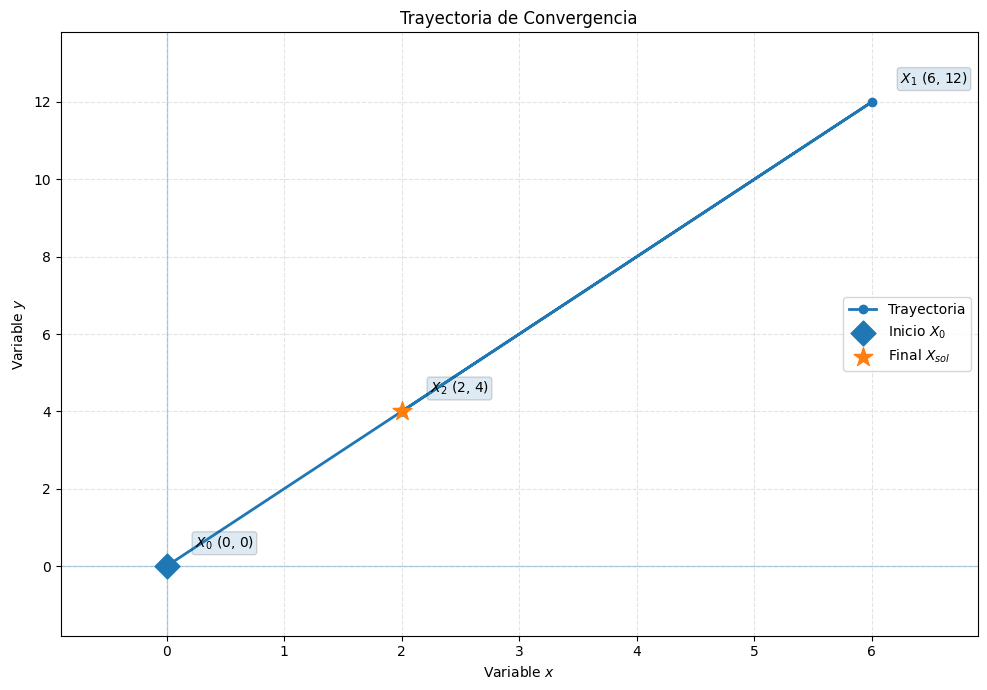

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


iteraciones = [
    (0, 0),
    (6, 12),
    (2, 4),
    (2, 4),
]
titulo = "Trayectoria de Convergencia"


def graficar_trayectoria(points, title="Trayectoria"):
    pts = np.array(points, dtype=float)

    fig, ax = plt.subplots(figsize=(10, 7))

    # Línea de trayectoria + puntos 
    ax.plot(pts[:, 0], pts[:, 1], marker="o", linewidth=2, label="Trayectoria")

    # Destacar inicio y final
    ax.scatter(pts[0, 0], pts[0, 1], s=160, marker="D", label=r"Inicio $X_0$", zorder=5)
    ax.scatter(pts[-1, 0], pts[-1, 1], s=200, marker="*", label=r"Final $X_{sol}$", zorder=6)

    # Offset automático para etiquetas
    rx = np.ptp(pts[:, 0]) or 1.0
    ry = np.ptp(pts[:, 1]) or 1.0
    ox, oy = 0.04 * rx, 0.04 * ry

    # Etiquetas (evita repetir si el punto es igual al anterior)
    for i, (x, y) in enumerate(pts):
        if i > 0 and x == pts[i - 1, 0] and y == pts[i - 1, 1]:
            continue
        ax.annotate(
            rf"$X_{{{i}}}$ ({x:g}, {y:g})",
            (x, y),
            xytext=(x + ox, y + oy),
            textcoords="data",
            fontsize=10,
            bbox=dict(boxstyle="round,pad=0.2", alpha=0.15),
            zorder=10
        )

    # Márgenes dinámicos
    mx = 0.15 * rx
    my = 0.15 * ry
    ax.set_xlim(pts[:, 0].min() - mx, pts[:, 0].max() + mx)
    ax.set_ylim(pts[:, 1].min() - my, pts[:, 1].max() + my)

    ax.axhline(0, linewidth=1, alpha=0.3)
    ax.axvline(0, linewidth=1, alpha=0.3)
    ax.grid(True, linestyle="--", alpha=0.35)

    ax.set_xlabel("Variable $x$")
    ax.set_ylabel("Variable $y$")
    ax.set_title(title)
    ax.legend(loc="best")

    plt.tight_layout()
    plt.show()

graficar_trayectoria(iteraciones, titulo)


In [2]:
import numpy as np
from src import gauss_jacobi, gauss_seidel

def resolver_sistema_iterativo(A, b, x0=None, tol=1e-5, max_iter=50):
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)

    n = A.shape[0]
    if x0 is None:
        x0 = np.zeros((n, 1))
    else:
        x0 = np.array(x0, dtype=float, ndmin=2).T

    # pendiente m de la segunda ecuación: a21 x + a22 y = b2 -> y = m x + c
    m = -A[1, 0] / A[1, 1]

    x_jacobi = gauss_jacobi(A=A, b=b, x=x0.copy(), tol=tol, max_iter=max_iter)
    x_seidel = gauss_seidel(A=A, b=b, x=x0.copy(), tol=tol, max_iter=max_iter)

    return x_jacobi, x_seidel, m


In [3]:
A1 = [[2, 1], [3, 2]]
b1 = [5, 8]

xj, xs, m = resolver_sistema_iterativo(A1, b1, max_iter=50)

print("Jacobi :", xj.ravel())
print("Seidel :", xs.ravel())
print("m =", m)


[02-18 10:55:07][INFO][PC-PR] i= 0 x: [[0. 0.]]
[02-18 10:55:07][INFO][PC-PR] i= 50 x: [[1.99849491 0.99924746]]
[02-18 10:55:07][INFO][PC-PR] i= 0 x: [[0. 0.]]
[02-18 10:55:07][INFO][PC-PR] i= 1 x: [[2.5  0.25]]
[02-18 10:55:07][INFO][PC-PR] i= 2 x: [[2.375  0.4375]]
[02-18 10:55:07][INFO][PC-PR] i= 3 x: [[2.28125  0.578125]]
[02-18 10:55:07][INFO][PC-PR] i= 4 x: [[2.2109375  0.68359375]]
[02-18 10:55:07][INFO][PC-PR] i= 5 x: [[2.15820312 0.76269531]]
[02-18 10:55:07][INFO][PC-PR] i= 6 x: [[2.11865234 0.82202148]]
[02-18 10:55:07][INFO][PC-PR] i= 7 x: [[2.08898926 0.86651611]]
[02-18 10:55:07][INFO][PC-PR] i= 8 x: [[2.06674194 0.89988708]]
[02-18 10:55:07][INFO][PC-PR] i= 9 x: [[2.05005646 0.92491531]]
[02-18 10:55:07][INFO][PC-PR] i= 10 x: [[2.03754234 0.94368649]]
[02-18 10:55:07][INFO][PC-PR] i= 11 x: [[2.02815676 0.95776486]]
[02-18 10:55:07][INFO][PC-PR] i= 12 x: [[2.02111757 0.96832365]]
[02-18 10:55:07][INFO][PC-PR] i= 13 x: [[2.01583818 0.97624274]]
[02-18 10:55:07][INFO][PC-P

In [4]:
def residuo(A, b, x):
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float).reshape(-1, 1)
    return np.linalg.norm(A @ x - b)


In [5]:
rj = residuo(A1, b1, xj)
rs = residuo(A1, b1, xs)

print("Residuo Jacobi:", rj)
print("Residuo Seidel:", rs)

if rs < rj:
    print("Mejor método: Gauss-Seidel")
else:
    print("Mejor método: Gauss-Jacobi")


Residuo Jacobi: 0.007099480785381242
Residuo Seidel: 7.945943831799696e-06
Mejor método: Gauss-Seidel


In [6]:
A2 = [[1, 1], [-2, 1]]
b2 = [6, 0]

# reordenar ecuaciones (swap filas)
A2r = [[-2, 1], [1, 1]]
b2r = [0, 6]

xj2, xs2, m2 = resolver_sistema_iterativo(A2r, b2r, max_iter=50)
print("Jacobi :", xj2.ravel())
print("Seidel :", xs2.ravel())
print("m =", m2)


[02-18 10:57:05][INFO][PC-PR] i= 0 x: [[0. 0.]]
[02-18 10:57:05][INFO][PC-PR] i= 0 x: [[0. 0.]]
[02-18 10:57:05][INFO][PC-PR] i= 1 x: [[-0.  6.]]
[02-18 10:57:05][INFO][PC-PR] i= 2 x: [[3. 3.]]
[02-18 10:57:05][INFO][PC-PR] i= 3 x: [[1.5 4.5]]
[02-18 10:57:05][INFO][PC-PR] i= 4 x: [[2.25 3.75]]
[02-18 10:57:05][INFO][PC-PR] i= 5 x: [[1.875 4.125]]
[02-18 10:57:05][INFO][PC-PR] i= 6 x: [[2.0625 3.9375]]
[02-18 10:57:05][INFO][PC-PR] i= 7 x: [[1.96875 4.03125]]
[02-18 10:57:05][INFO][PC-PR] i= 8 x: [[2.015625 3.984375]]
[02-18 10:57:05][INFO][PC-PR] i= 9 x: [[1.9921875 4.0078125]]
[02-18 10:57:05][INFO][PC-PR] i= 10 x: [[2.00390625 3.99609375]]
[02-18 10:57:05][INFO][PC-PR] i= 11 x: [[1.99804688 4.00195312]]
[02-18 10:57:05][INFO][PC-PR] i= 12 x: [[2.00097656 3.99902344]]
[02-18 10:57:05][INFO][PC-PR] i= 13 x: [[1.99951172 4.00048828]]
[02-18 10:57:05][INFO][PC-PR] i= 14 x: [[2.00024414 3.99975586]]
[02-18 10:57:05][INFO][PC-PR] i= 15 x: [[1.99987793 4.00012207]]
[02-18 10:57:05][INFO][P